<a href="https://colab.research.google.com/github/belenkf/belenkf/blob/main/DS_ETI_Arg_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mi nombre es María Belén Fabbrizi y estoy realizando el trabajo final del curso de DataScience dictado por e-learning de UTN BA, durante el ciclo 2024.

**Índice**

- Librerías
- Presentación del dataset
- Objetivo
- Exploración y Visualización Inicial (EDA)
 - Variables numéricas
 - Variables categóricas
- Pre-Processing Feature Encoding:
 - Conversión de Variables Categóricas a Numéricas
 - Limpieza de nulos, duplicados y Outliers
- Processing
 - Feature Scaling: Normalización o Escalado
 - Feature Selection: Análisis Estadístico
  - Feature Selection: Correlación
- Elección del Modelo de Aprendizaje
 - Supervisado:

 1- Regresión Logística Primaria

 2- Árbol de Decisión Primario
 - No supervsado

  1-  aplicación de K-means

  2-   Método del codo

  3-  visualización de clusters

  4- PCA + K-means
- Post-Processing Feature Selection:
 -  Mejora del modelo
- Visualización e Interpretación de los Modelos Obtenidos
- Conclusiones

**LIBRERÍAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import folium
import statistics
import geopy
from folium.plugins import HeatMap
from geopy.extra.rate_limiter import RateLimiter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

**PRESENTACIÓN DEL DATASET**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/informacion-publica-respiratorias-nacional.csv')
df.head(10)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),5,5 a 9,1
1,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),9,25 a 34,1
2,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
3,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),4,2 a 4,2
4,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),5,5 a 9,1
5,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),10,35 a 44,1
6,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),2,6 a 11 m,2
7,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),3,12 a 23 m,5
8,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),4,2 a 4,40
9,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),5,5 a 9,7


Éste dataset extrae resultados epidemiológicos de 3 patologías respiratorias a nivel nacional (clasificadas en departamentos por provincias) en relación a enfermedades en una brecha de tiempo (2020-2021) y según la cantidad de casos y edades.

Cada fila parece representar información sobre el número de casos reportados en un departamento  durante un año y semana epidemiológica determinada, desglosados por grupos de edad.
No puedo establecer cual es menor o mayor porque no están ordenados de esa forma.

## **OBJETIVO:**
Desarrollar un modelo de aprendizaje qué, a partir de los datos provistos me permita saber si:
- qué grpo etario es el que sufre mayor riesgo?
- Se correlacionan  las patologías respiratorias con los lugares más fríos (provincias del sur) del país o con los de mayor densidad de población (grandes capitales, conurbano) en función a la época del año (semanas epidemiológicas)
- se podrá predecir que zonas serán más afectadas a futuro?
- Se podrá saber si hay zonas en relación a la vulnerabilidad/ clase social?

**Exploración: conociendo el dataset (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203730 entries, 0 to 203729
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          203730 non-null  int64 
 1   departamento_nombre      203730 non-null  object
 2   provincia_id             203730 non-null  int64 
 3   provincia_nombre         203730 non-null  object
 4   anio                     203730 non-null  int64 
 5   semanas_epidemiologicas  203730 non-null  int64 
 6   evento_nombre            203730 non-null  object
 7   grupo_edad_id            203730 non-null  int64 
 8   grupo_edad_desc          203730 non-null  object
 9   cantidad_casos           203730 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.5+ MB


In [ ]:
df.tail(10)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
203720,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),5,5 a 9,3
203721,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),6,10 a 14,1
203722,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),7,15 a 19,1
203723,35,CONFLUENCIA,58,Neuquén,2020,8,Enfermedad tipo influenza (ETI),9,25 a 34,1
203724,35,CONFLUENCIA,58,Neuquén,2020,8,Enfermedad tipo influenza (ETI),11,45 a 64,1
203725,21,CAPITAL,42,La Pampa,2020,11,Enfermedad tipo influenza (ETI),10,35 a 44,1
203726,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),8,20 a 24,1
203727,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),9,25 a 34,1
203728,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),12,65 a 74,2
203729,21,DIAMANTE,30,Entre Ríos,2020,11,Neumonía (sin especificar),12,65 a 74,1


In [ ]:
df.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

El dataset cuenta con 10 columnas con 203730 resultados y no hay faltantes, 4 son objetos o palabras, el resto son números

In [ ]:
df.shape

(203730, 10)

In [ ]:
df.describe()

,departamento_id,provincia_id,anio,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,203730.000000,203730.000000,203730.000000,203730.000000,203730.000000,203730.000000
mean,131.297546,36.166338,2020.094660,21.039361,7.235851,2.250056
std,181.936717,26.261561,0.292745,15.113364,3.584929,3.108761
min,1.000000,2.000000,2020.000000,1.000000,1.000000,1.000000
25%,28.000000,10.000000,2020.000000,8.000000,4.000000,1.000000
50%,63.000000,30.000000,2020.000000,18.000000,7.000000,1.000000
75%,133.000000,54.000000,2020.000000,33.000000,10.000000,2.000000
max,882.000000,94.000000,2021.000000,53.000000,17.000000,188.000000



El describe me dice las medidas de tendencia central: que los datos tienen una: media de 131.2 en departamentos y de 36 en provincias.

La cantidad promedio de casos reportados por semana epidemiológica en un departamento es de alrededor de 21.

La mayoría de los departamentos parecen tener una cantidad relativamente baja de casos, con un promedio de aproximadamente 2 casos por semana.

Existe una variabilidad considerable en la cantidad de casos reportados, como se indica por la desviación estándar relativamente alta.

La mayoría de los casos parecen concentrarse en grupos de edad más jóvenes, ya que el grupo de edad con mayor cantidad de casos tiene un valor medio de alrededor de 7.
Existen diferencias en la distribución de casos entre los diferentes departamentos, como se refleja en los percentiles 25, 50 y 75.

Se observa que el departamento con la mayor cantidad de casos reportados tiene un máximo de 188 casos en una semana epidemiológica específica.

In [ ]:
provincias = df['provincia_nombre'].unique()
print(provincias)

['Córdoba' 'Entre Ríos' 'Misiones' 'Chaco' 'Tucumán' 'Corrientes'
 'San Juan' 'Tierra del Fuego' 'San Luis' 'Jujuy' 'Neuquén' 'Río Negro'
 'Buenos Aires' 'Formosa' 'Santiago del Estero' 'Salta' 'CABA' 'Mendoza'
 'La Rioja' 'Santa Cruz' 'Santa Fe' 'Catamarca' 'Chubut' 'La Pampa']


In [ ]:
len(df['departamento_nombre'].unique())

396

In [ ]:
departamentos_filtrados = df[(df['departamento_id'] >= 30) & (df['departamento_id'] <= 70)]
nombres_departamentos = departamentos_filtrados['departamento_nombre'].unique()
print(nombres_departamentos)

['GENERAL SAN MART?N' 'LA PAZ' 'JUAN BAUTISTA ALBERDI' 'CURUZ? CUATI?'
 'GOBERNADOR DUPUY' 'GUALEGUAY' 'LIBERTADOR GENERAL SAN MART?N'
 'RAM?N LISTA' 'LEANDRO N. ALEM' 'MONTEROS' 'CHILECITO' 'SAN PEDRO'
 'GENERAL ROCA' 'AZUL' 'PICHI MAHUIDA' 'JUN?N' 'LAS HERAS' 'L?CAR'
 'CAPITAL' 'LA CAPITAL' 'ISLAS DEL IBICUY' 'PILAG?S' 'JU?REZ CELMAN'
 'IGUAZ?' 'INDEPENDENCIA' 'J?CHAL' 'PIRAN?' 'GENERAL L?PEZ' 'POCITO'
 'CAUCETE' 'PALPAL?' 'ELDORADO' 'PATI?O' 'LULES' 'MARCOS JU?REZ' 'LEDESMA'
 'CERRILLOS' 'GENERAL PEDERNERA' 'GENERAL DONOVAN' 'GENERAL PAZ'
 'CONCEPCI?N' 'HUILICHES' 'GARAY' 'CONFLUENCIA' 'GUATRACH?' 'BELGRANO'
 '2 DE ABRIL' 'AVELLANEDA' 'CHICOANA' 'FELICIANO' 'SANTA B?RBARA'
 'GRL. JOS? DE SAN MART?N' 'CAPAY?N' 'FAMATINA' 'GUALEGUAYCH?'
 'FRAY JUSTO SANTA MAR?A DE ORO' 'GENERAL G?EMES' 'COPO' 'PILCANIYEU'
 'GENERAL OBLIGADO' 'FUTALEUF?' 'MAIP?' 'LAVALLE' 'CONHELO' 'LAS COLONIAS'
 'BANDA' 'PILCOMAYO' 'GAIMAN' '?ORQUINC?' 'LUJ?N DE CUYO' 'LA COCHA'
 'CHIMBAS' 'BAH?A BLANCA' 'LOS LAGOS' 

**VARIABLES NUMÉRICAS**

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
covariance_matrix = numerical_df.cov()
print(covariance_matrix)

                         departamento_id  provincia_id      anio  \
departamento_id             33100.968856  -2261.306526 -0.877515   
provincia_id                -2261.306526    689.669606  0.022747   
anio                           -0.877515      0.022747  0.085700   
semanas_epidemiologicas       -47.292708      5.271180 -1.500165   
grupo_edad_id                  -5.513943      0.026091  0.017202   
cantidad_casos                  1.201551     -2.721055  0.013541   

                         semanas_epidemiologicas  grupo_edad_id  \
departamento_id                       -47.292708      -5.513943   
provincia_id                            5.271180       0.026091   
anio                                   -1.500165       0.017202   
semanas_epidemiologicas               228.413772       3.366618   
grupo_edad_id                           3.366618      12.851716   
cantidad_casos                         -0.185831       0.182923   

                         cantidad_casos  
departament

**VARIABLES CATEGÓRICAS**

In [ ]:
df.columns.value_counts()

,count
departamento_id,1
departamento_nombre,1
provincia_id,1
provincia_nombre,1
anio,1
semanas_epidemiologicas,1
evento_nombre,1
grupo_edad_id,1
grupo_edad_desc,1
cantidad_casos,1


In [ ]:
df.groupby('departamento_nombre').describe()

departamento_id                                        \
                              count        mean         std    min    25%   
departamento_nombre                                                         
12 DE OCTUBRE                 682.0   36.000000    0.000000   36.0   36.0   
1a DE MAYO                    273.0  126.000000    0.000000  126.0  126.0   
2 DE ABRIL                     74.0   39.000000    0.000000   39.0   39.0   
25 DE MAYO                   1280.0  125.901562   29.073840   91.0   91.0   
9 DE JULIO                   1786.0  271.757559  242.726693   49.0  105.0   
...                             ...         ...         ...    ...    ...   
YAVI                          174.0  112.000000    0.000000  112.0  112.0   
YERBA BUENA                   464.0  119.000000    0.000000  119.0  119.0   
Z?RATE                        870.0  882.000000    0.000000  882.0  882.0   
ZAPALA                        247.0  112.028340    0.166279  112.0  112.0   
ZONDA                           5.0  133.000000    0.000000  133.0  133.0   

                                         provincia_id            ...  \
                       50%    75%    max        count      mean  ...   
departamento_nombre                                              ...   
12 DE OCTUBRE         36.0   36.0   36.0        682.0  22.00000  ...   
1a DE MAYO           126.0  126.0  126.0        273.0  22.00000  ...   
2 DE ABRIL            39.0   39.0   39.0         74.0  22.00000  ...   
25 DE MAYO           126.0  168.0  168.0       1280.0  52.67500  ...   
9 DE JULIO           105.0  588.0  588.0       1786.0  25.18925  ...   
...                    ...    ...    ...          ...       ...  ...   
YAVI                 112.0  112.0  112.0        174.0  38.00000  ...   
YERBA BUENA          119.0  119.0  119.0        464.0  90.00000  ...   
Z?RATE               882.0  882.0  882.0        870.0   6.00000  ...   
ZAPALA               112.0  112.0  113.0        247.0  58.00000  ...   
ZONDA                133.0  133.0  133.0          5.0  70.00000  ...   

                    grupo_edad_id       cantidad_casos                      \
                              75%   max          count      mean       std   
departamento_nombre                                                          
12 DE OCTUBRE                9.00  13.0          682.0  1.288856  0.846601   
1a DE MAYO                   9.00  12.0          273.0  1.344322  0.741703   
2 DE ABRIL                  11.75  17.0           74.0  1.148649  0.394567   
25 DE MAYO                  10.00  17.0         1280.0  2.004688  2.069166   
9 DE JULIO                  10.00  17.0         1786.0  1.562710  1.129556   
...                           ...   ...            ...       ...       ...   
YAVI                        10.00  13.0          174.0  1.827586  1.218422   
YERBA BUENA                 10.00  17.0          464.0  1.558190  1.298303   
Z?RATE                       8.00  13.0          870.0  2.621839  3.154733   
ZAPALA                      12.00  13.0          247.0  1.979757  2.192836   
ZONDA                        3.00   3.0            5.0  1.400000  0.547723   

                                               
                     min  25%  50%  75%   max  
departamento_nombre                            
12 DE OCTUBRE        1.0  1.0  1.0  1.0  11.0  
1a DE MAYO           1.0  1.0  1.0  1.0   6.0  
2 DE ABRIL           1.0  1.0  1.0  1.0   3.0  
25 DE MAYO           1.0  1.0  1.0  2.0  18.0  
9 DE JULIO           1.0  1.0  1.0  2.0  12.0  
...                  ...  ...  ...  ...   ...  
YAVI                 1.0  1.0  1.0  2.0   9.0  
YERBA BUENA          1.0  1.0  1.0  2.0  14.0  
Z?RATE               1.0  1.0  1.0  3.0  25.0  
ZAPALA               1.0  1.0  1.0  2.0  15.0  
ZONDA                1.0  1.0  1.0  2.0   2.0  

[396 rows x 48 columns]

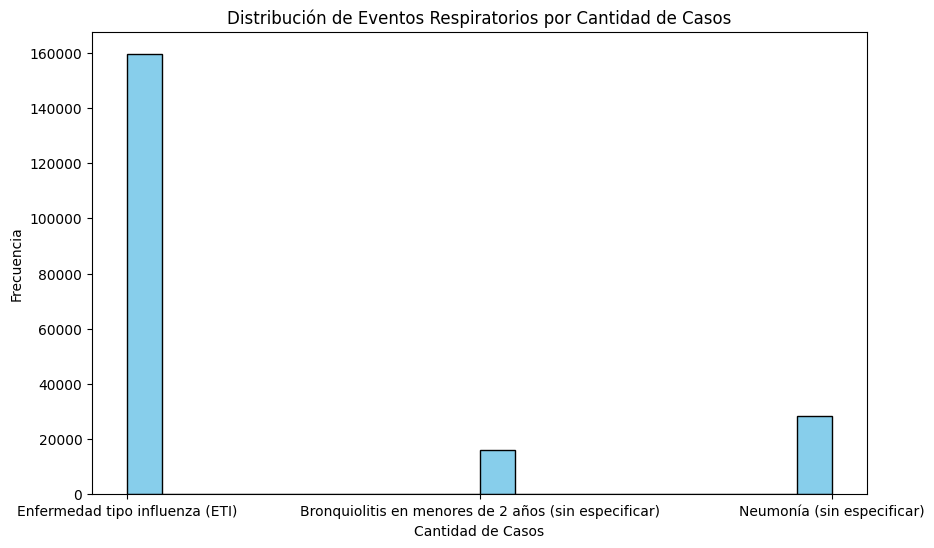

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['evento_nombre'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Eventos Respiratorios por Cantidad de Casos')
plt.xlabel('Cantidad de Casos')
plt.ylabel('Frecuencia')
plt.show()

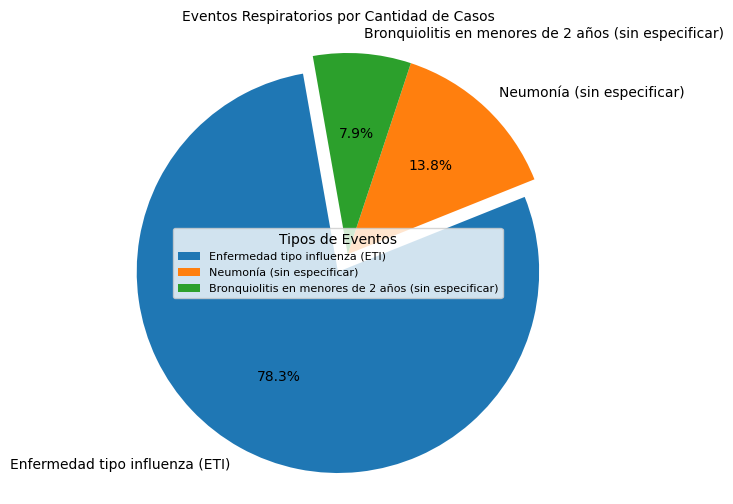

In [ ]:
nombre_evento = df['evento_nombre'].value_counts()

x = nombre_evento.index.to_list()
y = nombre_evento.values.tolist()

plt.figure(figsize=(6, 6))
explode = [0] * len(x)
explode[0] = 0.1
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=100, explode=explode,
        textprops={'fontsize': 10})
plt.title('Eventos Respiratorios por Cantidad de Casos', fontsize=10, pad=8)
plt.axis('equal')
plt.legend(x, title="Tipos de Eventos", loc="best", fontsize=8)
plt.show()

In [ ]:
grouped_events = df.groupby('evento_nombre')['evento_nombre'].count().sort_values(ascending=False)
print(grouped_events)

evento_nombre
Enfermedad tipo influenza (ETI)                         159504
Neumonía (sin especificar)                               28214
Bronquiolitis en menores de 2 años (sin especificar)     16012
Name: evento_nombre, dtype: int64


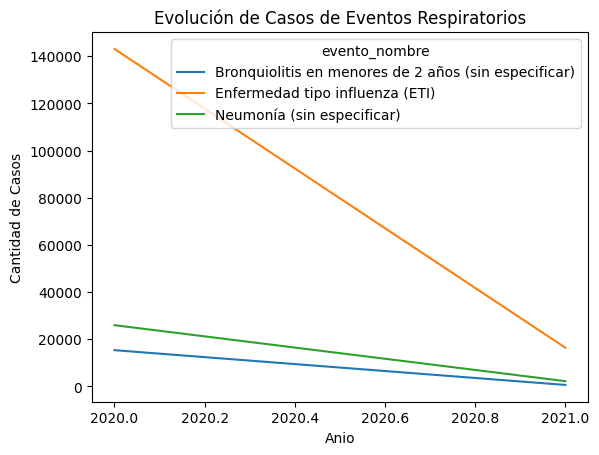

In [ ]:
grouped_events_by_year = df.groupby(['anio', 'evento_nombre'])['evento_nombre'].count().unstack()
grouped_events_by_year.plot(kind='line')
plt.title('Evolución de Casos de Eventos Respiratorios')
plt.xlabel('Anio')
plt.ylabel('Cantidad de Casos')
plt.show()

In [ ]:
contingency_table = pd.crosstab([df['departamento_nombre'], df['grupo_edad_desc']], df['evento_nombre'])
print(contingency_table)

evento_nombre                        Bronquiolitis en menores de 2 años (sin especificar)  \
departamento_nombre grupo_edad_desc                                                         
12 DE OCTUBRE       10 a 14                                                          0      
                    12 a 23 m                                                       43      
                    15 a 19                                                          0      
                    2 a 4                                                            0      
                    20 a 24                                                          0      
...                                                                                ...      
ZAPALA              65 a 74                                                          0      
                    < 6 m                                                            5      
                    >= a 75                                           

In [ ]:
semanas_por_anio = df.groupby('anio')['semanas_epidemiologicas'].nunique()
print(semanas_por_anio)

anio
2020    53
2021    11
Name: semanas_epidemiologicas, dtype: int64


## **Conclusión del análisis descriptivo:**
En éste caso, los datos epidemiológicos me dicen:
  - Los datos tienen correlación lineal descendente

-  con la covarianza, que se podría ver si hay una relación entre la cantidad de casos de una enfermedad y alguna variable específica, como la edad de los afectados o la ubicación geográfica.

Ejemplo:
año y semana epidemiológica se mueven en dirección opuesta como los deptos y las semanas epidemiológicas o deptos y grupos de edad o provincia y cantidad de casos.

A diferencia de provincia y semana epidemiológica o grupo de edad y semanas epidemiológicas que van en la misma dirección.

Esto podría ayudar a identificar posibles factores de riesgo asociados con la propagación de la enfermedad y a tomar medidas preventivas o de intervención más efectivas cuando saquemos las consluciones definitivas.

# **VISUALIZACIÓN DE DATOS:**

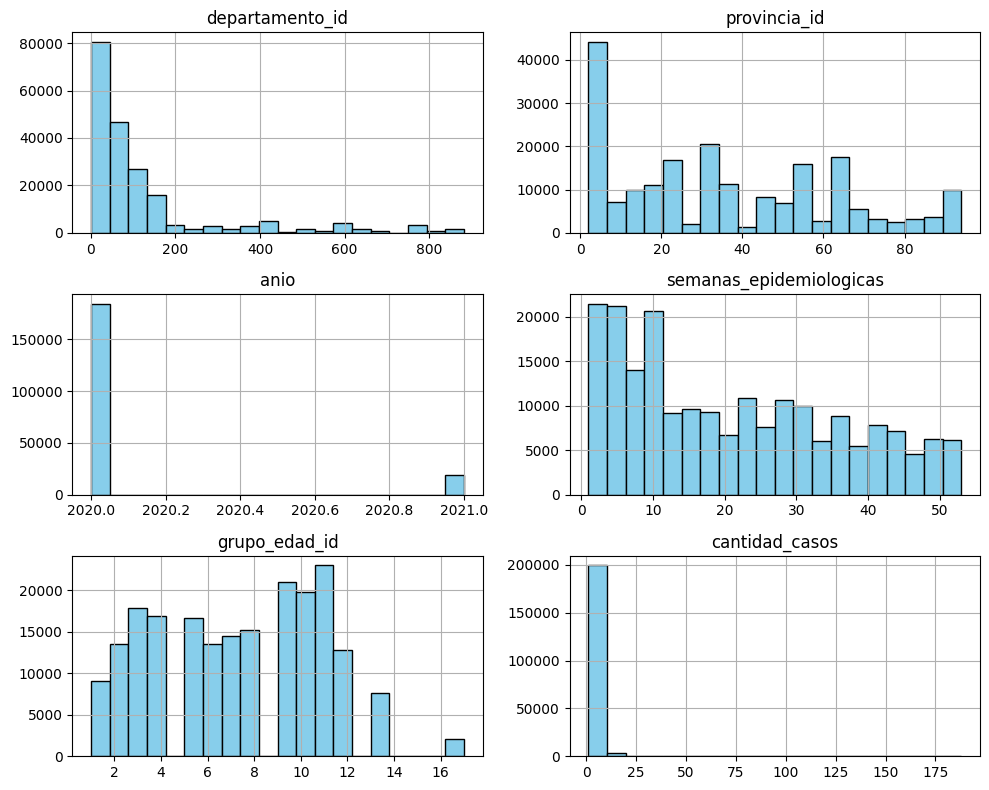

In [ ]:
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

De éstos gráficos podríamos sacar algunas conclusiones pero no nos brindan el detalle de algunas cuestiones como provincias o departamentos más afectados y si la edad de 2 años es la más afectada por lo que la toma como importate ni podemos desglosar cuales son las semanas epidemiológicas que más afectaron y a que zona, región.

# **Pre-Processing Feature Encoding: Conversión de Variables Categóricas a Numéricas**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['departamento_nombre', 'provincia_nombre', 'evento_nombre',
       'grupo_edad_desc'],
      dtype='object')


In [ ]:
evento_max = df['evento_nombre'].value_counts().idxmax()
print(f'El evento más ocurrido es: {evento_max}')

El evento más ocurrido es: Enfermedad tipo influenza (ETI)


In [ ]:
semana_evento = df.groupby('evento_nombre')['semanas_epidemiologicas'].nunique().sort_values(ascending=False)
print(semana_evento)

evento_nombre
Bronquiolitis en menores de 2 años (sin especificar)    53
Enfermedad tipo influenza (ETI)                         53
Neumonía (sin especificar)                              53
Name: semanas_epidemiologicas, dtype: int64


In [ ]:
evento_max_grupo_edad = df[df['evento_nombre'] == evento_max]['grupo_edad_desc'].value_counts().idxmax()
print(f'El grupo etario que más padece el evento {evento_max} es: {evento_max_grupo_edad}')

El grupo etario que más padece el evento Enfermedad tipo influenza (ETI) es: 25 a 34


In [ ]:
evento_max_grupo_edad = df[df['evento_nombre'] == evento_max]['grupo_edad_desc'].value_counts().idxmax()
semanas_evento_max_grupo_edad = df[(df['evento_nombre'] == evento_max) & (df['grupo_edad_desc'] == evento_max_grupo_edad)]['semanas_epidemiologicas'].unique()
print(f'Las semanas epidemiológicas que corresponden a los casos del grupo etario {evento_max_grupo_edad} para el evento {evento_max} son: {semanas_evento_max_grupo_edad}')

Las semanas epidemiológicas que corresponden a los casos del grupo etario 25 a 34 para el evento Enfermedad tipo influenza (ETI) son: [47  6  8 10  7 53  5  2 51 52  4  1  9 45 33 34 44 50 39  3 46 40 35 41
 49 28 43 26 42 18 11 15 37 21 48 38 19 27 31 36 14 12 24 23 16 29 22 25
 20 32 17 13 30]


El código solo extrae las semanas epidemiológicas únicas en las que se registraron casos de influenza. No calcula ni muestra el número de casos para cada semana.

In [ ]:
filtered_df = df[(df['evento_nombre'] == evento_max) & (df['grupo_edad_desc'] == evento_max_grupo_edad)]
top_5_provincias_filtered = filtered_df.groupby('provincia_nombre')['cantidad_casos'].sum().sort_values(ascending=False).head(5)
print(f'Las 5 provincias que más padecen el evento {evento_max} en el grupo etario {evento_max_grupo_edad} son:\n{top_5_provincias_filtered}')

Las 5 provincias que más padecen el evento Enfermedad tipo influenza (ETI) en el grupo etario 25 a 34 son:
provincia_nombre
Buenos Aires    11592
Misiones         5218
Río Negro        3398
Chaco            3302
Jujuy            3180
Name: cantidad_casos, dtype: int64


In [ ]:
df.notnull().sum()

,0
departamento_id,203730
departamento_nombre,203730
provincia_id,203730
provincia_nombre,203730
anio,203730
semanas_epidemiologicas,203730
evento_nombre,203730
grupo_edad_id,203730
grupo_edad_desc,203730
cantidad_casos,203730


In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

34527
0


Es así como vemos que no hay existencia de datos nulos ni duplicados

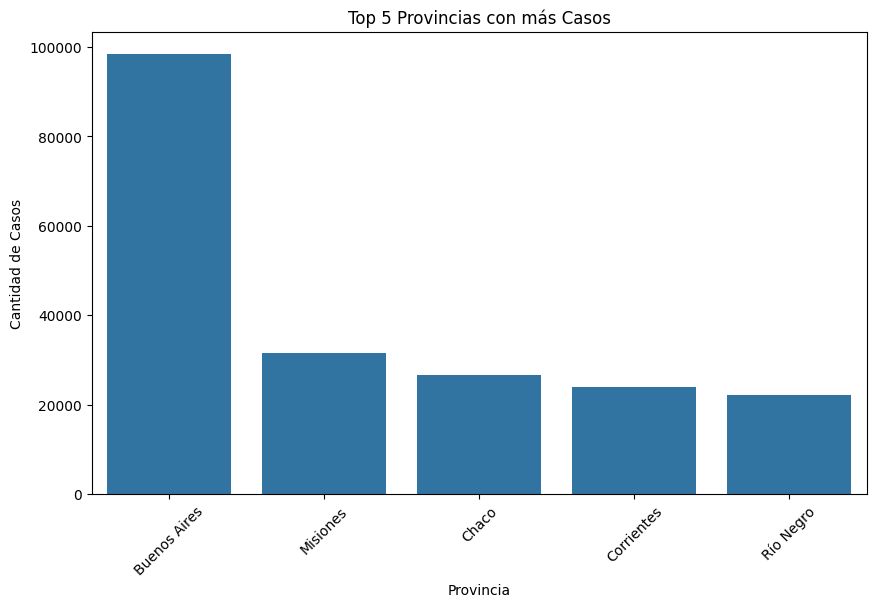

In [ ]:
casos_por_provincia = df.groupby('provincia_nombre')['cantidad_casos'].sum()
top_5_provincias = casos_por_provincia.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_provincias.index, y=top_5_provincias.values)
plt.title('Top 5 Provincias con más Casos')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)
plt.show()

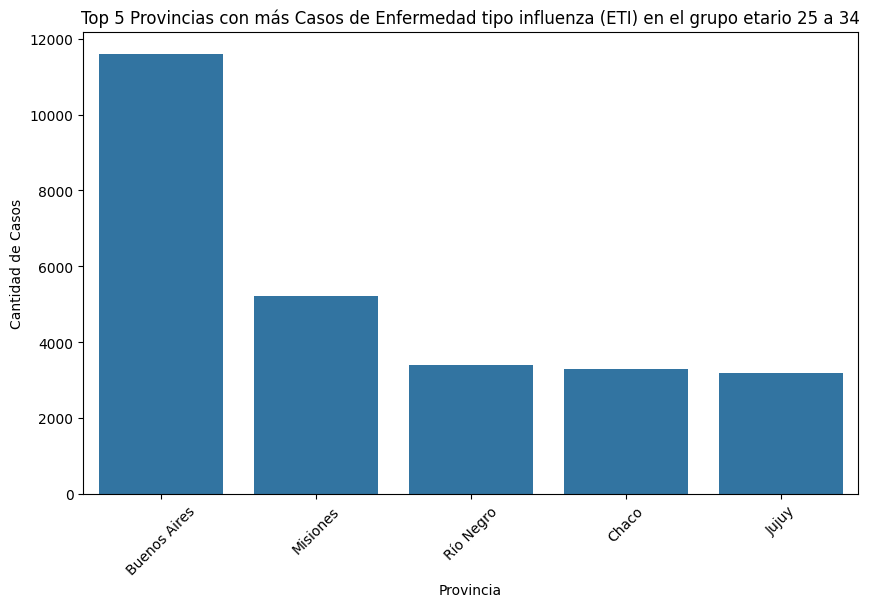

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_provincias_filtered.index, y=top_5_provincias_filtered.values)
plt.title(f'Top 5 Provincias con más Casos de {evento_max} en el grupo etario {evento_max_grupo_edad}')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)
plt.show()

#**Limpieza de Outliers**

Se evaluan los Outliers para cada una de las variables numéricas que corresponden a columnas del Data Set

In [ ]:
departamentos_por_provincia = df.groupby('provincia_nombre')['departamento_nombre'].unique()
print(departamentos_por_provincia)

provincia_nombre
Buenos Aires           [Z?RATE, GENERAL VILLEGAS, SAN MIGUEL, ALMIRAN...
CABA                   [COMUNA 5, COMUNA 1, COMUNA 8, COMUNA 12, COMU...
Catamarca              [CAPITAL, LA PAZ, AMBATO, CAPAY?N, TINOGASTA, ...
Chaco                  [BERMEJO, SAN FERNANDO, CHACABUCO, LIBERTADOR ...
Chubut                 [RAWSON, FUTALEUF?, ESCALANTE, GAIMAN, BIEDMA,...
Corrientes             [CURUZ? CUATI?, CAPITAL, SAN MART?N, SALADAS, ...
Córdoba                [GENERAL SAN MART?N, UNI?N, SANTA MAR?A, GENER...
Entre Ríos             [LA PAZ, GUALEGUAY, FEDERACI?N, ISLAS DEL IBIC...
Formosa                [RAM?N LISTA, LAISHI, PILAG?S, PIRAN?, PATI?O,...
Jujuy                  [DR. MANUEL BELGRANO, SAN PEDRO, PALPAL?, SUSQ...
La Pampa               [CAPITAL, GUATRACH?, RANCUL, HUCAL, CONHELO, A...
La Rioja               [CAPITAL, CHILECITO, ROSARIO VERA PE?ALOZA, FA...
Mendoza                [GENERAL ALVEAR, SAN RAFAEL, SAN CARLOS, JUN?N...
Misiones               [CAPITAL, L

In [ ]:
departamentos_mendoza = df[df['provincia_nombre'] == 'Mendoza']['departamento_nombre'].unique()
print(departamentos_mendoza)

['GENERAL ALVEAR' 'SAN RAFAEL' 'SAN CARLOS' 'JUN?N' 'LAS HERAS'
 'RIVADAVIA' 'GUAYMALL?N' 'SAN MART?N' 'MAIP?' 'LAVALLE' 'LUJ?N DE CUYO'
 'TUPUNGATO' 'CAPITAL' 'MALARG?E' 'TUNUY?N' 'GODOY CRUZ' 'SANTA ROSA'
 'LA PAZ']


In [ ]:
departamentos_neuquen = df[df['provincia_nombre'] == 'Neuquén']['departamento_nombre'].unique()
print(departamentos_neuquen)

['A?ELO' 'L?CAR' 'ZAPALA' 'HUILICHES' 'CONFLUENCIA' 'ALUMIN?' '?ORQU?N'
 'LOS LAGOS' 'PICUNCHES' 'MINAS' 'LONCOPU?' 'CHOS MALAL' 'COLL?N CUR?'
 'PEHUENCHES' 'CAT?N LIL' 'PIC?N LEUF?']


In [ ]:
departamentos_rionegro = df[df['provincia_nombre'] == 'Río Negro']['departamento_nombre'].unique()
print(departamentos_rionegro)

['AVELLANEDA' 'GENERAL ROCA' '25 DE MAYO' 'PICHI MAHUIDA' 'ADOLFO ALSINA'
 'PILCANIYEU' 'CONESA' 'SAN ANTONIO' '?ORQUINC?' 'BARILOCHE' '9 DE JULIO'
 'VALCHETA' 'EL CUY']


In [ ]:
departamentos_santacruz = df[df['provincia_nombre'] == 'Santa Cruz']['departamento_nombre'].unique()
print(departamentos_santacruz)

['LAGO ARGENTINO' 'DESEADO' 'CORPEN AIKE' 'G?ER AIKE' 'MAGALLANES'
 'R?O CHICO' 'LAGO BUENOS AIRES']


In [ ]:
departamentos_tdf = df[df['provincia_nombre'] == 'Tierra del Fuego']['departamento_nombre'].unique()
print(departamentos_tdf)

['USHUAIA' 'R?O GRANDE']


In [ ]:
departamentos_msn = df[df['provincia_nombre'] == 'Misiones']['departamento_nombre'].unique()
print(departamentos_msn)

['CAPITAL' 'LIBERTADOR GRL. SAN MART?N' 'LEANDRO N. ALEM' 'SAN IGNACIO'
 'IGUAZ?' 'ELDORADO' 'CONCEPCI?N' 'CANDELARIA' 'SAN JAVIER' '25 DE MAYO'
 'OBER?' 'AP?STOLES' 'MONTECARLO' 'SAN PEDRO' 'CAINGU?S' 'GUARAN?'
 'GENERAL MANUEL BELGRANO']


In [ ]:
departamentos_bsas = df[df['provincia_nombre'] == 'Buenos Aires']['departamento_nombre'].unique()
print(departamentos_bsas)

['Z?RATE' 'GENERAL VILLEGAS' 'SAN MIGUEL' 'ALMIRANTE BROWN' 'LA PLATA'
 'SAN ANDR?S DE GILES' 'RIVADAVIA' 'AZUL' 'CHACABUCO' 'PEHUAJ?' 'ESCOBAR'
 'CARLOS CASARES' 'GENERAL LAS HERAS' 'GENERAL GUIDO' 'PELLEGRINI'
 'PRESIDENTE PER?N' 'VILLARINO' 'CORONEL DE MARINA L. ROSALES' 'JUN?N'
 'EZEIZA' 'CASTELLI' 'LAN?S' 'LA MATANZA' 'TANDIL' 'OLAVARR?A' 'LOBER?A'
 'COMUNA 11' 'TRENQUE LAUQUEN' 'MAIP?' 'CAMPANA' 'LUJ?N' 'LOMAS DE ZAMORA'
 'GENERAL SAN MART?N' 'AVELLANEDA' 'TAPALQU?' 'SAN VICENTE' 'LA COSTA'
 'MOR?N' 'TIGRE' 'FLORENCIO VARELA' 'LAPRIDA' 'BENITO JU?REZ' 'TORNQUIST'
 'ESTEBAN ECHEVERR?A' 'ENSENADA' 'CORONEL SU?REZ' 'ROQUE P?REZ'
 'SAN ISIDRO' 'BAH?A BLANCA' 'ADOLFO ALSINA' 'BERISSO' 'CARLOS TEJEDOR'
 'RAUCH' '9 DE JULIO' 'BALCARCE' 'GENERAL PUEYRRED?N' 'NAVARRO' 'MONTE'
 'PU?N' 'RAMALLO' 'BOL?VAR' 'GENERAL RODR?GUEZ' 'CORONEL PRINGLES'
 'HIP?LITO YRIGOYEN' 'CA?UELAS' 'CORONEL DORREGO' 'TRES ARROYOS' 'PILAR'
 'DOLORES' 'PINAMAR' 'GENERAL LA MADRID' 'HURLINGHAM' 'LINCOLN'
 'BERAZATEGU

In [ ]:
departamentos_chaco = df[df['provincia_nombre'] == 'Chaco']['departamento_nombre'].unique()
print(departamentos_chaco)

['BERMEJO' 'SAN FERNANDO' 'CHACABUCO' 'LIBERTADOR GENERAL SAN MART?N'
 'INDEPENDENCIA' 'SAN LORENZO' "O'HIGGINS" 'COMANDANTE FERN?NDEZ'
 'GENERAL DONOVAN' '1a DE MAYO' 'SARGENTO CABRAL' 'QUITILIPI'
 'MAYOR LUIS J. FONTANA' '2 DE ABRIL' 'ALMIRANTE BROWN' '9 DE JULIO'
 'FRAY JUSTO SANTA MAR?A DE ORO' '25 DE MAYO' 'GENERAL G?EMES'
 'GENERAL BELGRANO' 'PRESIDENCIA DE LA PLAZA' 'MAIP?' '12 DE OCTUBRE'
 'LIBERTAD' 'TAPENAG?']


In [ ]:
departamentos_ctes = df[df['provincia_nombre'] == 'Corrientes']['departamento_nombre'].unique()
print(departamentos_ctes)

['CURUZ? CUATI?' 'CAPITAL' 'SAN MART?N' 'SALADAS' 'SAN ROQUE'
 'GENERAL PAZ' 'SAN COSME' 'PASO DE LOS LIBRES' 'ITAT?'
 'SAN LUIS DEL PALMAR' 'ITUZAING?' 'MONTE CASEROS' 'CONCEPCI?N'
 'BELLA VISTA' 'MERCEDES' 'SANTO TOM?' 'GENERAL ALVEAR' 'SAN MIGUEL'
 'EMPEDRADO' 'BER?N DE ASTRADA']


In [ ]:
Q1 = df['anio'].quantile(0.25)
Q3 = df['anio'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['anio'] < (Q1 - 1.5 * IQR)) | (df['anio'] > (Q3 + 1.5 * IQR)))]

In [ ]:
departamentos_sur = departamentos_mendoza.tolist() + departamentos_neuquen.tolist() + departamentos_rionegro.tolist() + departamentos_santacruz.tolist() + departamentos_tdf.tolist()
print(departamentos_sur)
df['region_sur_detallada'] = df['departamento_nombre'].apply(lambda x: 1 if x in departamentos_sur else 0)


['GENERAL ALVEAR', 'SAN RAFAEL', 'SAN CARLOS', 'JUN?N', 'LAS HERAS', 'RIVADAVIA', 'GUAYMALL?N', 'SAN MART?N', 'MAIP?', 'LAVALLE', 'LUJ?N DE CUYO', 'TUPUNGATO', 'CAPITAL', 'MALARG?E', 'TUNUY?N', 'GODOY CRUZ', 'SANTA ROSA', 'LA PAZ', 'A?ELO', 'L?CAR', 'ZAPALA', 'HUILICHES', 'CONFLUENCIA', 'ALUMIN?', '?ORQU?N', 'LOS LAGOS', 'PICUNCHES', 'MINAS', 'LONCOPU?', 'CHOS MALAL', 'COLL?N CUR?', 'PEHUENCHES', 'CAT?N LIL', 'PIC?N LEUF?', 'AVELLANEDA', 'GENERAL ROCA', '25 DE MAYO', 'PICHI MAHUIDA', 'ADOLFO ALSINA', 'PILCANIYEU', 'CONESA', 'SAN ANTONIO', '?ORQUINC?', 'BARILOCHE', '9 DE JULIO', 'VALCHETA', 'EL CUY', 'LAGO ARGENTINO', 'DESEADO', 'CORPEN AIKE', 'G?ER AIKE', 'MAGALLANES', 'R?O CHICO', 'LAGO BUENOS AIRES', 'USHUAIA', 'R?O GRANDE']


In [ ]:
provincias_sur = ['Mendoza', 'Neuquén', 'Santa Cruz', 'Chubut', 'Río Negro', 'Tierra del Fuego']
df['region_sur'] = df['provincia_nombre'].apply(lambda x: 1 if x in provincias_sur else 0)
print(provincias_sur)

['Mendoza', 'Neuquén', 'Santa Cruz', 'Chubut', 'Río Negro', 'Tierra del Fuego']


## **Feature Scaling: Normalización o Escalado**


Una vez que se eliminan aquellos valores que se decide descartar, resulta conveniente realizar un escalado de todos los datos correspondientes a variables numéricas, para poder evaluarlos en conjunto. Si bien suele llevarse a cabo una estandarización entre los valores (-1;1), se considera el rango (0;1) para de este modo poder realizar feature selection mediante un método que no admite la incorporación de números negativos.

In [ ]:
numerical_cols = ['anio', 'semanas_epidemiologicas', 'cantidad_casos']
scaler = MinMaxScaler(feature_range=(0, 1))
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('ID', errors='ignore')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.index = df['departamento_nombre']
print(departamentos_filtrados)

        departamento_id departamento_nombre  provincia_id provincia_nombre  \
0                    42  GENERAL SAN MART?N            14          Córdoba   
1                    42  GENERAL SAN MART?N            14          Córdoba   
2                    70              LA PAZ            30       Entre Ríos   
3                    70              LA PAZ            30       Entre Ríos   
4                    70              LA PAZ            30       Entre Ríos   
...                 ...                 ...           ...              ...   
203723               35         CONFLUENCIA            58          Neuquén   
203724               35         CONFLUENCIA            58          Neuquén   
203726               63          LA CAPITAL            82         Santa Fe   
203727               63          LA CAPITAL            82         Santa Fe   
203728               63          LA CAPITAL            82         Santa Fe   

        anio  semanas_epidemiologicas                    evento

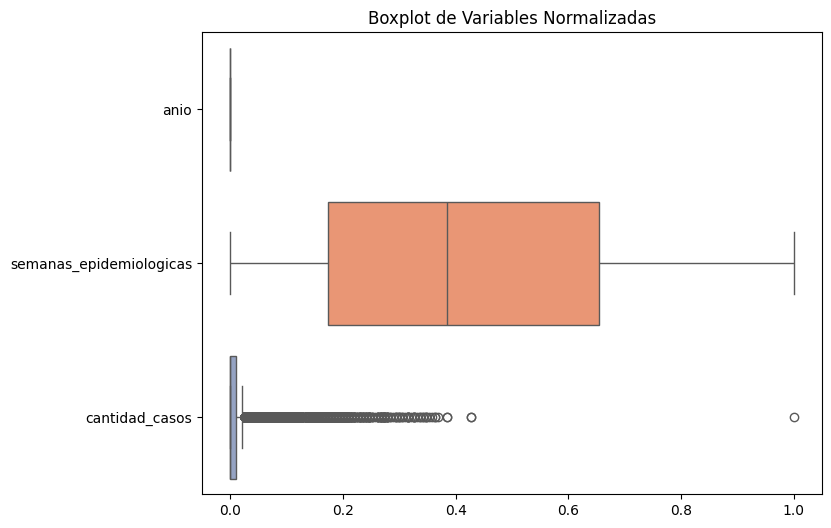

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_cols], orient='h', palette='Set2')
plt.title('Boxplot de Variables Normalizadas')
plt.show()

# **Feature Selection: Análisis Estadístico**

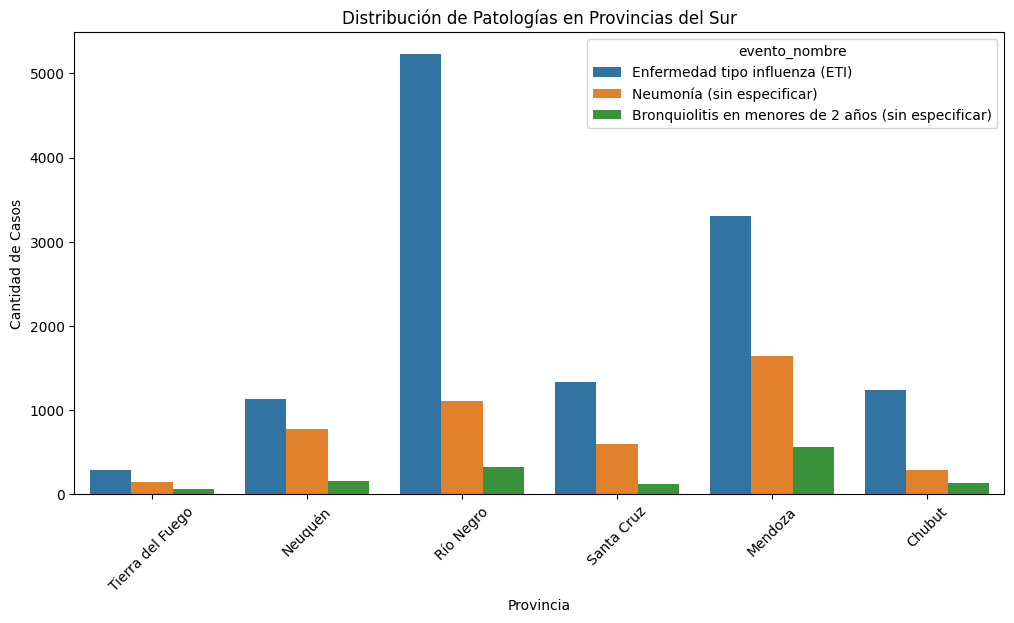

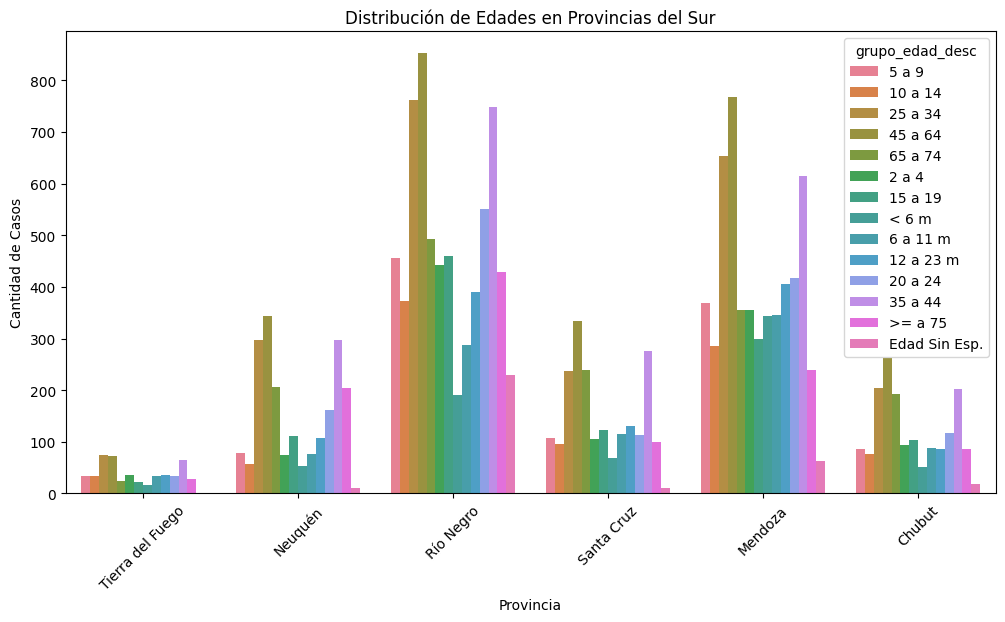

In [ ]:
sur_provincias = df[df['region_sur'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='provincia_nombre', hue='evento_nombre', data=sur_provincias)
plt.title('Distribución de Patologías en Provincias del Sur')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='provincia_nombre', hue='grupo_edad_desc', data=sur_provincias)
plt.title('Distribución de Edades en Provincias del Sur')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)
plt.show()

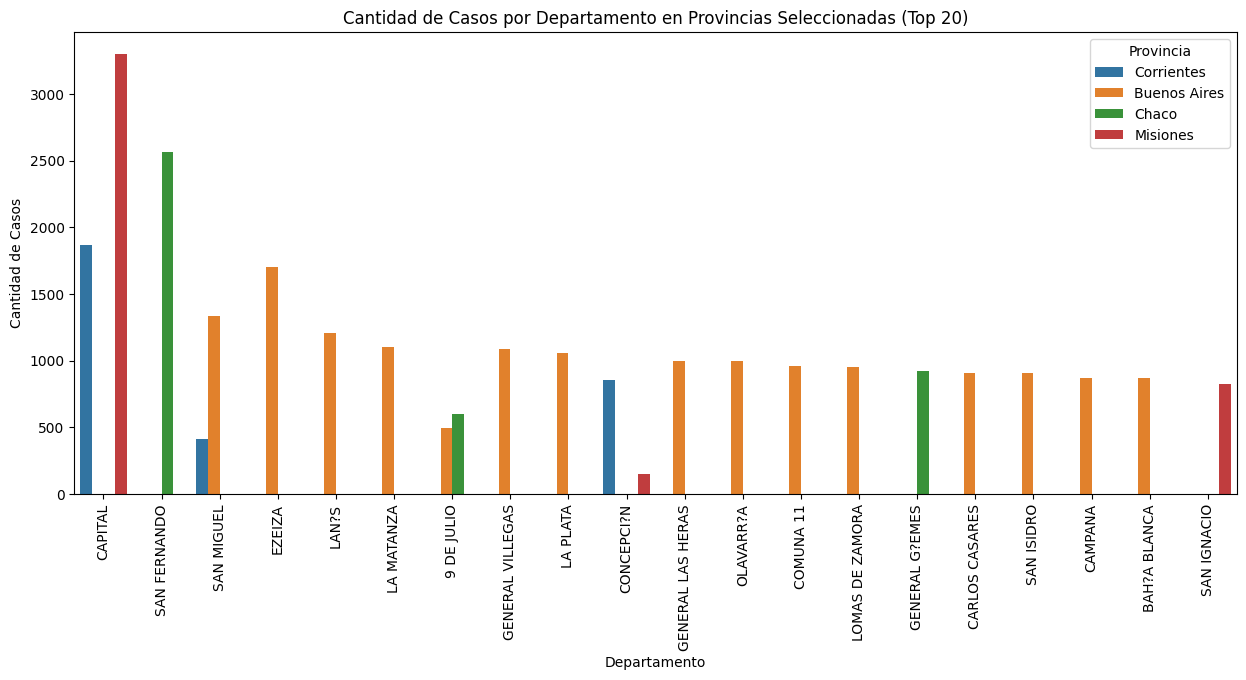

In [ ]:
provincias_a_comparar = ['Provincias_Sur', 'Corrientes', 'Chaco', 'Misiones', 'Buenos Aires']
df_comparacion = df[df['provincia_nombre'].isin(provincias_a_comparar)]
top_20_departamentos = df_comparacion['departamento_nombre'].value_counts().nlargest(20).index
df_top_20 = df_comparacion[df_comparacion['departamento_nombre'].isin(top_20_departamentos)]

plt.figure(figsize=(15, 6))
sns.countplot(x='departamento_nombre', hue='provincia_nombre', data=df_top_20, order=top_20_departamentos)
plt.title('Cantidad de Casos por Departamento en Provincias Seleccionadas (Top 20)')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=90)
plt.legend(title='Provincia', loc='upper right')
plt.show()

In [ ]:
df_ETI = df[df['evento_nombre'] == 'Enfermedad tipo influenza (ETI)']
casos_por_semana = df_ETI.groupby('semanas_epidemiologicas')['cantidad_casos'].sum()
print(casos_por_semana)

semanas_epidemiologicas
0.000000    23.716578
0.019231    26.957219
0.038462    24.048128
0.057692    25.748663
0.076923    27.497326
0.096154    29.828877
0.115385    29.561497
0.134615    28.379679
0.153846    33.812834
0.173077    41.550802
0.192308    52.513369
0.211538    34.342246
0.230769    15.791444
0.250000    12.946524
0.269231    11.283422
0.288462    11.732620
0.307692    12.582888
0.326923    11.839572
0.346154    12.368984
0.365385    12.946524
0.384615    13.534759
0.403846    14.721925
0.423077    15.165775
0.442308    17.438503
0.461538    16.417112
0.480769    15.764706
0.500000    16.540107
0.519231    15.128342
0.538462    17.764706
0.557692    18.572193
0.576923    16.278075
0.596154    18.823529
0.615385    18.005348
0.634615    16.679144
0.653846    18.727273
0.673077    19.743316
0.692308    20.315508
0.711538    17.331551
0.730769    19.181818
0.750000    18.770053
0.769231    17.754011
0.788462    16.411765
0.807692    15.647059
0.826923    13.550802
0.846154

## Aquí podemos ver a que semana/s epidemiologica/s corresponden los mayores casos/cantidad para poder determinar luego y hacer un prospect de las semanas que a futuro afectarán a un grupo etario en particular (24 a 35 años que es el más afectado!!!!)

# **Processing Feature Selection: Correlación**

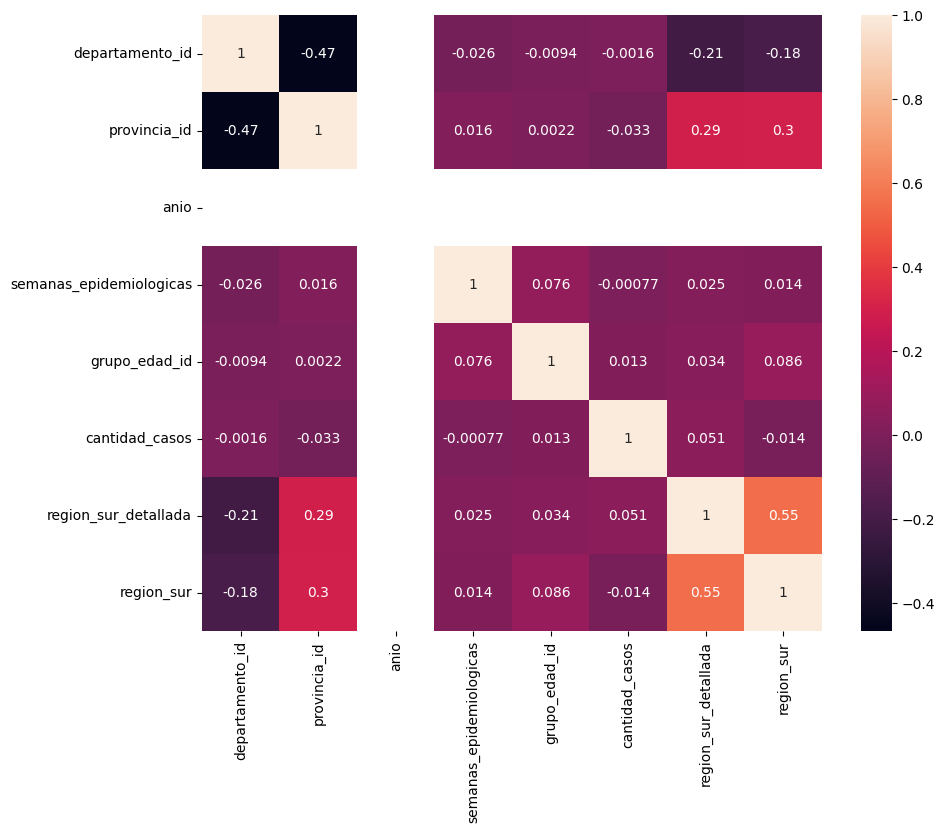

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlations = correlation_matrix['region_sur'].sort_values(ascending=False)
print(correlations)

region_sur                 1.000000
region_sur_detallada       0.552375
provincia_id               0.296739
grupo_edad_id              0.085992
semanas_epidemiologicas    0.014009
cantidad_casos            -0.014032
departamento_id           -0.180405
anio                            NaN
Name: region_sur, dtype: float64


**Interpretación de los valores de correlación:**

La correlación entre cantidad_casos y region_sur es 0.6, esto sugiere que hay una tendencia a que haya más casos en las regiones del sur. Por otro lado, si la correlación entre semana_epidemiologica y region_sur es -0.2, esto podría sugerir que ciertas semanas epidemiológicas tienden a tener menos casos en las regiones del sur.
Eso podría arribar a la primer hipótesis de que no por ser del SUR habrpa mayor cantidad de casos pero ETI se da en un 0.06. Podría ser que mayodr de influenza que de casos en sí

La correlación no implica causalidad. Una correlación fuerte no significa necesariamente que una variable cause la otra. Podría haber otros factores que influyen en ambas variables.

In [ ]:
correlations_spearman = numeric_df.corr(method='spearman')['region_sur'].sort_values(ascending=False)
print(correlations_spearman)

region_sur                 1.000000
region_sur_detallada       0.552375
provincia_id               0.310300
grupo_edad_id              0.086167
semanas_epidemiologicas    0.010138
cantidad_casos            -0.051980
departamento_id           -0.221078
anio                            NaN
Name: region_sur, dtype: float64


Según ésta correlacion denotamos:
Existe una correlación positiva débil entre 'Región Sur' y '': region_sur_detallada, provincia_id, Neumonía, grupo_edad_id, semanas_epidemiologicas.
De lo contrario, con  las demás variables hay una correlacion negativa débil.

#**MODELO DE APRENDIZAJE SUPERVISADO**

Elijo éste tipo de modelo ya que quiero ver con un análisis prospectivo si los pacientes de determinado grupo etario se van a enfermar o no.

El Aprendizaje Supervisado, para ése dataset no es el adecuado ya que nos sirve para saber sólo la variable objetivo a predecir.
A modo de práctica la utilizaremos de todas formas.

#**Regresión Logística Primaria**

La regresión logística es un método comunmente utilizado para predecir el valor de una variable categórica en función de otras variables con las que se contemple una relación relevante.

In [ ]:
df['ETI_24_35'] = ((df['evento_nombre'] == 'Enfermedad tipo influenza (ETI)') & (df['grupo_edad_desc'] == '24 a 35 años')).astype(int)

creo una nueva columna que extraiga sólo los datos dentro de enfermedad tipo influenza ETI para el grupo de edad de 24 a 35 años para saber si los mismos son los que más se enferman y en que semanas o por qué región.

In [ ]:
X = df[['semanas_epidemiologicas', 'grupo_edad_id', 'region_sur']]
y = df['evento_nombre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(y_pred_logreg)
print("Exactitud del modelo de regresión logística:", accuracy_score(y_test, y_pred_logreg))

['Enfermedad tipo influenza (ETI)' 'Enfermedad tipo influenza (ETI)'
 'Enfermedad tipo influenza (ETI)' ... 'Enfermedad tipo influenza (ETI)'
 'Enfermedad tipo influenza (ETI)' 'Enfermedad tipo influenza (ETI)']
Exactitud del modelo de regresión logística: 0.7587947936133241


# La exactitud del modelo de regresión logística es una medida de qué tan bien el modelo predice el resultado (enfermarse o no) en el conjunto de prueba. En este caso, la exactitud es del 0.71, lo que significa que el modelo predice correctamente el resultado el 71% de las veces.

como el evento tiene más de una variable, hago un modelo de regresión logística para ver si predice el resultado enfermarse o no en función a evento_max.

In [ ]:
df['enfermo'] = (df['evento_nombre'] == evento_max).astype(int)

X = df[['semanas_epidemiologicas', 'grupo_edad_id', 'region_sur']]
y = df['enfermo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

Exactitud del modelo: 0.7562047145995213


tiene un 75% de fiabilidad el modelo en relación a tener ETI

DADO QUE EL MODELO DE REGRESIÓN LÓGICA NO ES EL ADECUADO, COMO SE MENCIONÓ ANTERIORMENTE POR EL TIPO DE VARIABLES, SE PROCEDE A SELECCIONAR O ANALIZAR A TRAVEZ DE UN MODELO RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Exactitud del modelo Random Forest:", accuracy_rf)


Exactitud del modelo Random Forest: 0.7728325612177366



# La principal diferencia entre Random Forest y la regresión logística primaria radica en su enfoque para la predicción y la forma en que manejan la complejidad de los datos.

# **PORQUÉ SE ELIGE UN MODELO TIPO Random Forest?**

# * **Porque es un modelo basado en árboles de decisión:** ya que éste es un modelo de conjunto que construye múltiples árboles de decisión y combina sus predicciones para obtener un resultado final.
# * **Porque maneja relaciones no lineales:** Puede capturar relaciones no lineales entre las variables predictoras y la variable objetivo.
# * Porque es menos sensible a valores atípicos que la regresión logística.
# * Porque la interpretación del modelo es más compleja debido a la combinación de múltiples árboles de decisión.

# **En resumen:**

# Random Forest es generalmente más potente y preciso que la regresión logística, especialmente cuando se trata de datos complejos con relaciones no lineales.
# La regresión logística es más simple de interpretar y puede ser preferible cuando la interpretabilidad del modelo es crucial.

# **En el contexto del código:**

# Se observa que Random Forest obtiene una exactitud ligeramente superior a la regresión logística (0.76 vs 0.75). Esto sugiere que Random Forest puede estar capturando mejor las relaciones entre las variables predictoras y la probabilidad de enfermarse. Sin embargo, la diferencia en exactitud es pequeña, por lo que la elección del modelo podría depender de otros factores, como la interpretabilidad o la complejidad del modelo.


#**Árbol de decisión**

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(y_pred_tree)

print("Exactitud del árbol de decisión:", accuracy_score(y_test, y_pred_tree))

[1 1 1 ... 1 1 1]
Exactitud del árbol de decisión: 0.7702698272187797




# La exactitud del árbol de decisión es una medida de qué tan bien el modelo
# predice el resultado (enfermarse o no) en el conjunto de prueba. En este caso,
# la exactitud es del 0.77, lo que significa que el modelo predice correctamente
# el resultado el 77% de las veces.


 Claramente su aplicación práctica en este caso ese para conocer o podría ayudar a predecir qué tipo de enfermedad se esperaría según el grupo de edad y la semana y tomar conductas tanto por (por ejemplo) del ministerio de salud o en cada provincia del sur en particular sirviendo para tomar conductas preventivas los meses o semanas previas a las semanas epidemiológicas previstas para el desarrollo o afección de casos y edades de riesgo de contraer ETI. Sin embargo, la predicción sigue siendo baja, quizá, para tomar una medida ministerial o que no sea juzgada con más variables en cada provincia.

In [ ]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Decision Tree Accuracy: {accuracy_tree}')

Logistic Regression Accuracy: 0.0
Decision Tree Accuracy: 0.7702698272187797


REALIZO UN GRÁFICO DE BARRAS COMPARANDO LA EXACTITUD DE LOS MODELOS SUPERVISADOS

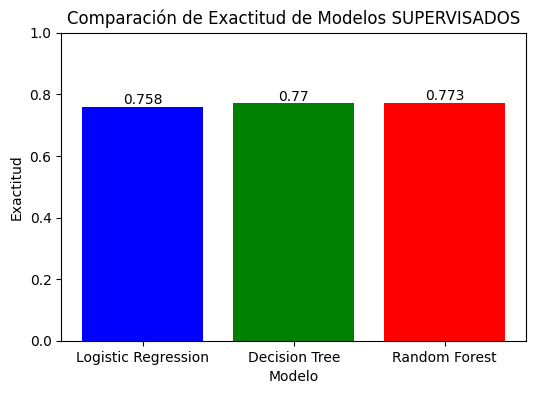

In [ ]:
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_tree, accuracy_rf]

plt.figure(figsize=(6, 4))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Exactitud')
plt.title('Comparación de Exactitud de Modelos SUPERVISADOS')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()

#**APRENDIZAJE NO SUPERVISADO**

Aplicación de K-means

In [ ]:
features = df[['semanas_epidemiologicas', 'grupo_edad_id', 'region_sur']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
labels = kmeans.labels_
df['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Utilización del Método del codo:

In [ ]:
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

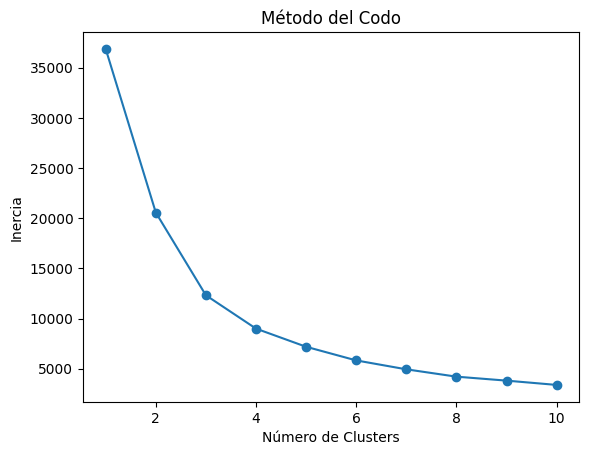

In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

ësto me dice que analizando 4 clusters ya tengo suficiente para un buen muestreo, pero voy a chequear si el número es óptimo aplicando K-means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizar los Clusters

[[6.97236872e-01 4.09088009e-01 7.60780328e-14]
 [1.99503897e-01 3.62865126e-01 1.21708199e-13]
 [4.30153239e-01 4.43199643e-01 1.00000000e+00]]


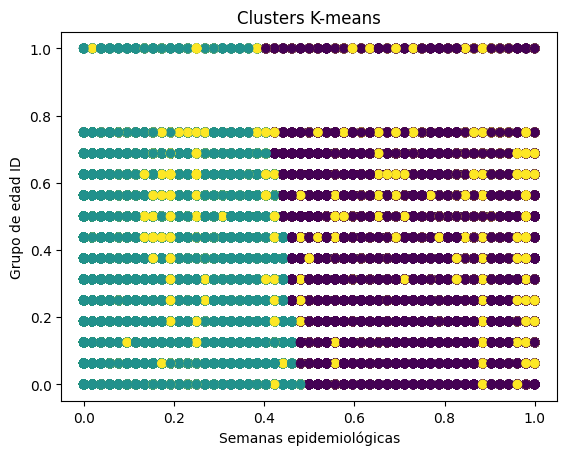

In [ ]:
print(kmeans.cluster_centers_)

plt.scatter(df['semanas_epidemiologicas'], df['grupo_edad_id'], c=df['cluster'])
plt.xlabel('Semanas epidemiológicas')
plt.ylabel('Grupo de edad ID')
plt.title('Clusters K-means')
plt.show()

Analizar las características de cada cluster

In [ ]:
for i in range(3):
  cluster_data = df[df['cluster'] == i]
  print(f'Cluster {i}:')
  print(cluster_data[['semanas_epidemiologicas', 'grupo_edad_id', 'region_sur', 'evento_nombre']].describe())
  print('\n')

Cluster 0:
       semanas_epidemiologicas  grupo_edad_id  region_sur
count             58979.000000   58979.000000     58979.0
mean                  0.696390       0.408516         0.0
std                   0.162319       0.222764         0.0
min                   0.403846       0.000000         0.0
25%                   0.557692       0.187500         0.0
50%                   0.673077       0.437500         0.0
75%                   0.826923       0.562500         0.0
max                   1.000000       1.000000         0.0


Cluster 1:
       semanas_epidemiologicas  grupo_edad_id  region_sur
count             75036.000000   75036.000000     75036.0
mean                  0.198764       0.363184         0.0
std                   0.130381       0.228605         0.0
min                   0.000000       0.000000         0.0
25%                   0.096154       0.187500         0.0
50%                   0.192308       0.375000         0.0
75%                   0.307692       0.562500   


El análisis de clusters puede proporcionar información sobre los grupos de pacientes con características similares en términos de semanas epidemiológicas, grupo de edad y región.
Observando las características de cada cluster, se pueden identificar patrones y tendencias que ayuden a predecir la probabilidad de enfermarse en determinado grupo etario.

Sería recomendable: Explorar diferentes números de clusters y métodos de clustering para encontrar la mejor segmentación de los datos,  analizar la distribución de las variables dentro de cada cluster para obtener una comprensión más profunda de las características de los pacientes y utilizar la información de los clusters para desarrollar estrategias de prevención y atención médica más específicas para cada grupo de pacientes.

#**Uso de PCA + K-means**
Éste método me explica la variabilidad de los datos haciendo que, con menos componentes, x entrecruzamiento, agrupados y dimensionando los datos, vuelvo a aplicar K-means, lo que me ayuda a ver mejor sin error.
Entonces, obtengo mayor separacion de los grupos y mejor dimensionalidad de los datos.


Selecciono las características numéricas para PCA y las aplico reduciendo a 2 componentes principales y creo un nuevo df para componentes principales, usando un nuevo K-means para 4 clusters ya qye con 3 no había casi superposición de datos

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df)

print('Varianza explicada por cada componente principal:')
print(pca.explained_variance_ratio_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Varianza explicada por cada componente principal:
[0.37389117 0.32870318]


Esto significa que:
- La varianza explicada por cada componente principal indica cuánto de la variabilidad total de los datos es capturada por cada componente.

- En este caso, PCA se ha utilizado para reducir la dimensionalidad de los datos a dos componentes principales.
La salida `pca.explained_variance_ratio_` muestra la proporción de la varianza total de los datos que es explicada por cada componente principal.
- a salida es [0.37, 0.32], significa que el primer componente principal explica el 37% de la varianza de los datos y el segundo componente principal explica el 32% de la varianza.

La varianza explicada es una medida importante para evaluar la efectividad de PCA.
# Cuanto mayor sea la varianza explicada por los primeros componentes principales, mejor será la reducción de dimensionalidad.

**Visualización de PCA con K-means**

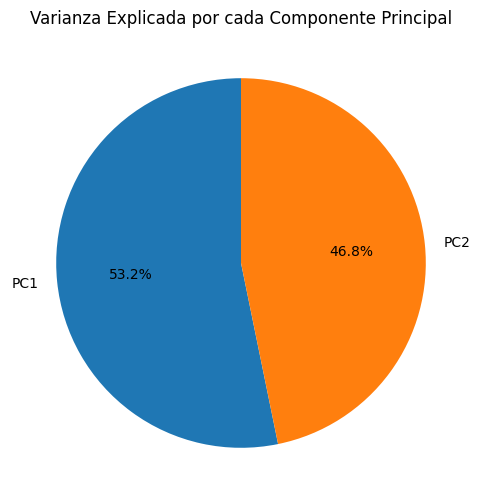

In [ ]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.pie(pca.explained_variance_ratio_, labels=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], autopct='%1.1f%%', startangle=90)
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()

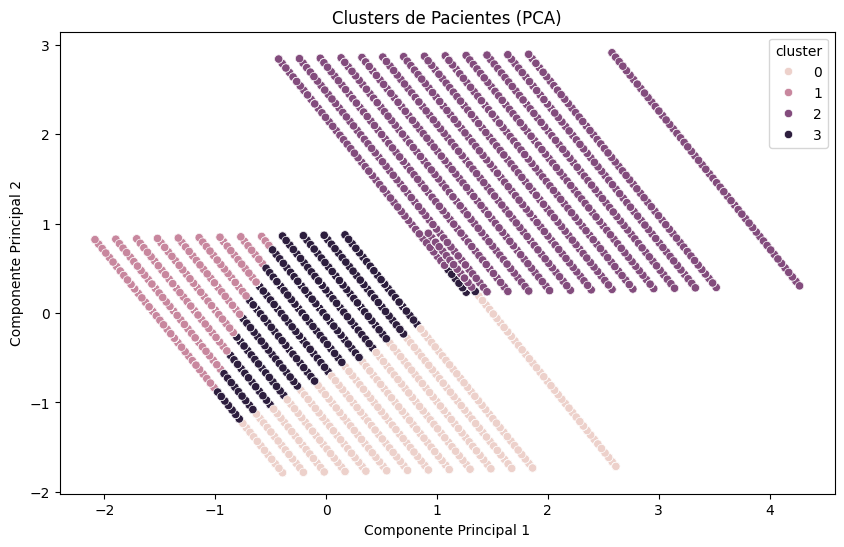

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df)
plt.title('Clusters de Pacientes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

#**Post-Processing Feature Selection**

#**ya que estamos me pregunto, se puede mejorar el modelo???**

#En base a los modelos obtenidos, el mejor modelo es el árbol de decisión, ya que tiene una exactitud ligeramente superior a la regresión logística.
 Sin embargo, ambos modelos tienen un rendimiento relativamente bajo, lo que sugiere que se pueden mejorar aún más.

- Utilizo la técnica de Grid Search para encontrar los mejores hiperparámetros para el modelo de árbol de decisión.
-- Ajusto los hiperparámetros
-- Ajusto el modelo con los datos de entrenamiento
-- Imprimo los mejores hiperparámetros

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)
print("Exactitud del árbol de decisión optimizado:", accuracy_score(y_test, y_pred_best_tree))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud del árbol de decisión optimizado: 0.7719746893544474


- Manejo de Datos Desbalanceados:

Si los datos están desbalanceados (es decir, hay una clase que tiene muchos más ejemplos que la otra), se puede utilizar la técnica de sobremuestreo (oversampling) para equilibrar los datos.

- Inicializo SMOTE
- Creo un nuevo modelo de árbol de decisión

In [ ]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
tree_resampled = DecisionTreeClassifier()
tree_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = tree_resampled.predict(X_test)
print("Exactitud del árbol de decisión con sobremuestreo:", accuracy_score(y_test, y_pred_resampled))

Exactitud del árbol de decisión con sobremuestreo: 0.6947968919051835


Creo una nueva característica que combine la semana epidemiológica y el grupo de edad.

In [ ]:
df['semana_edad'] = df['semanas_epidemiologicas'] * df['grupo_edad_id']

corrijo algunos datos del código

In [ ]:
df[df['departamento_nombre'] == 'General San Martín']
df.loc[df['departamento_nombre'] == 'General San Martín', 'cantidad_casos'] = df.loc[df['departamento_nombre'] == 'General San Martín', 'cantidad_casos'].astype(float)

In [ ]:
df = df[df['departamento_nombre'] != "O'HIGGINS"]
df = df[df['departamento_nombre'] != "PATI?O"]

In [ ]:
departamentos_a_corregir = ['General San Martín', "O'HIGGINS", 'PATIÑO']
df_filtrado = df[df['departamento_nombre'].isin(departamentos_a_corregir)]
correcciones = {
    "O'HIGGINS": 'OHIGGINS',
    'PATIÑO': 'PATINO'
}
df_filtrado['departamento_nombre'] = df_filtrado['departamento_nombre'].replace(correcciones)
df_filtrado['cantidad_casos'] = df_filtrado['cantidad_casos'].astype(float)
df.update(df_filtrado)
print(df[df['departamento_nombre'].isin(list(correcciones.values()) + ['General San Martín'])])


Empty DataFrame
Columns: [departamento_id, departamento_nombre, provincia_id, provincia_nombre, anio, semanas_epidemiologicas, evento_nombre, grupo_edad_id, grupo_edad_desc, cantidad_casos, region_sur_detallada, region_sur, ETI_24_35, enfermo, cluster, semana_edad]
Index: []


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Exactitud del árbol de decisión:", accuracy_score(y_test, y_pred_tree))
importances = tree.feature_importances_

feature_importances = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print(sorted_features)

Exactitud del árbol de decisión: 0.7702698272187797
[('grupo_edad_id', 0.7788199908736173), ('semanas_epidemiologicas', 0.18136233073289057), ('region_sur', 0.03981767839349204)]


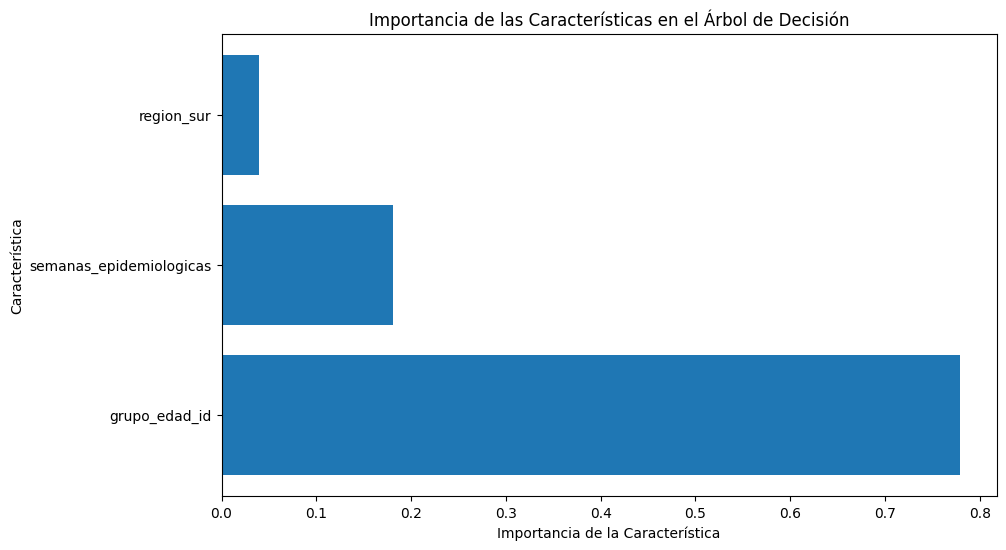

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_features], [x[1] for x in sorted_features])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.show()


# Observacion:

# La selección de características basada en la correlación y la importancia de las características del árbol de decisión son dos técnicas útiles para identificar las características más relevantes para un modelo.
# Estas técnicas pueden ayudar a mejorar el rendimiento del modelo al eliminar las características irrelevantes o redundantes.


#Evalúo el modelo
- creo una matríz de confusión
- realizo una visualización

Matriz de confusión:
[[ 2231  5231]
 [ 1724 21315]]


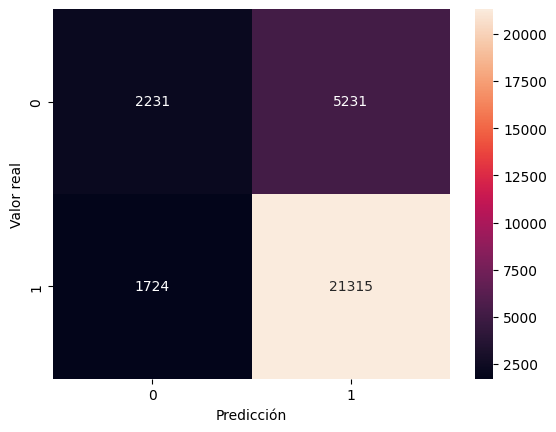

In [ ]:
cm = confusion_matrix(y_test, y_pred_best_tree)
print("Matriz de confusión:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# **CONCLUSIÓN FINAL**


# El análisis exploratorio de datos (EDA) reveló información sobre la distribución de casos de enfermedades respiratorias en Argentina, destacando la prevalencia de ETI en el grupo de edad de 24 a 35 años y la necesidad de investigar más a fondo las tendencias regionales.

# Los modelos de aprendizaje automático, como la regresión logística y el árbol de decisión, mostraron un potencial moderado para predecir la probabilidad de enfermarse, pero su precisión podría mejorarse.

# La aplicación de técnicas de aprendizaje no supervisado, como K-means y PCA, permitió identificar clusters de pacientes con características similares, lo que podría ser útil para desarrollar estrategias de prevención y atención médica más específicas.

# La selección de características y el manejo de datos desbalanceados son técnicas importantes para mejorar el rendimiento de los modelos de aprendizaje automático.

# En general, el análisis de datos proporciona información valiosa para comprender las tendencias de las enfermedades respiratorias en Argentina  y para desarrollar estrategias de salud pública más efectivas.

# Limitaciones:

# - Los modelos de aprendizaje automático utilizados tienen una precisión limitada y podrían mejorarse con la inclusión de más datos y variables.
# - El análisis se basa en datos agregados a nivel de departamento y no considera las variaciones individuales dentro de cada departamento.
# - Se necesitan más estudios para comprender completamente las causas y los factores de riesgo de las enfermedades respiratorias en Argentina.

#RECOMENDACIONES:

1. Explorar más variables:

Variables geográficas: Utilizar mapas para visualizar la concentración geográfica de las enfermedades respiratorias.
Variables demográficas: Estudiar la relación entre las enfermedades respiratorias y variables como sexo (que no fue tomada en éste dataset), nivel socioeconómico, acceso a servicios de salud, etc.
Variables ambientales: Investigar la posible influencia de factores ambientales como la contaminación del aire, la temperatura, la humedad, etc.
Variables temporales: Analizar la evolución de los casos a lo largo del tiempo, identificando patrones estacionales o tendencias a largo plazo.

2. Considerar la incorporación de datos externos:

Datos climáticos: Para analizar la influencia de factores climáticos en las enfermedades respiratorias.
Datos socioeconómicos: Para estudiar la relación entre la incidencia de enfermedades respiratorias y la vulnerabilidad social.

En lo personal, fue todo un desafío realizar éste trabajo ya que no contaba con las suficientes herramientas de estadística y la dificultad adicional de la vida en vacaciones.
Fue muy grato sentir que pude encontrarle más sentido a los datos que sólo miraba pero no lograba visualizar en profundidad.

#**MUCHAS GRACIAS!**